In [80]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

classifier = Sequential()

classifier.add(Input(shape=(128, 128, 3), name='input'))

# 4 conv and pooling layers
classifier.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

# fcl
classifier.add(Dense(units=128, activation='relu', name='fcl'))
classifier.add(Dense(units=1, activation='sigmoid', name='output'))

# logging the initiated random kernels from first conv layer 
def log_initial_kernels(model):
    for layer in model.layers:
        if layer.name == 'conv1':
            kernels, biases = layer.get_weights()
            print(f"Layer {layer.name} initial kernels:")
            for i in range(kernels.shape[-1]):
                kernel_matrix = kernels[:, :, :, i]
                print(f"Kernel {i+1}:\n{kernel_matrix}\n")

log_initial_kernels(classifier)

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Layer conv1 initial kernels:
Kernel 1:
[[[ 0.00901137  0.01404065 -0.01086286]
  [ 0.13679866 -0.02387957  0.01523444]
  [-0.05780287  0.08123134  0.06050268]]

 [[-0.00038706  0.10585828  0.03946131]
  [-0.10901295 -0.09643094  0.12166129]
  [ 0.09476045 -0.00170256  0.05933785]]

 [[-0.07996368 -0.08964808 -0.03468823]
  [-0.07604014  0.03225154 -0.04547761]
  [-0.08412935  0.04429044  0.1342475 ]]]

Kernel 2:
[[[-0.01449536  0.04473986  0.12278514]
  [ 0.13752414  0.03129055 -0.08245027]
  [-0.10698272  0.10213596 -0.0126536 ]]

 [[ 0.12194233  0.03893244  0.09696986]
  [-0.094967    0.07841453 -0.08284843]
  [ 0.07901619 -0.00685827  0.07935619]]

 [[-0.13681465 -0.100179   -0.05755187]
  [-0.12898207  0.06475462  0.12208252]
  [-0.10609165  0.10966535 -0.0853337 ]]]

Kernel 3:
[[[ 0.1374207  -0.04896415 -0.10595036]
  [ 0.10057096 -0.12301638 -0.05883815]
  [ 0.08771095 -0.13407354  0.10224421]]

 [[ 0.01279625  0.01938826  0.08048855]
  [ 0.06275311  0.03076011 -0.1011673 ]
  [-0

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# batch_size=32

# datagen doesnt regenerate images from the original data
training_set = train_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Train',
                                                 target_size=(128, 128),
                                                 batch_size=9,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\probi\Downloads\Naani\Dataset\Test',
                                             target_size=(128, 128),
                                             batch_size=9,
                                             class_mode='binary')

history = classifier.fit(training_set,
                          steps_per_epoch=575,
                          epochs=10,
                          validation_data=test_set,
                          validation_steps=119)

# history = classifier.fit(training_set,
#                        steps_per_epoch=len(training_set),
#                        epochs=10,  
#                        validation_data=test_set,
#                        validation_steps=len(test_set),
#                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

model_save_path = r'C:\Users\probi\Downloads\Naani-server\model.h5'
classifier.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 92s 156ms/step - accuracy: 0.6703 - loss: 0.6010 - val_accuracy: 0.8683 - val_loss: 0.3642
Epoch 2/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 56s 97ms/step - accuracy: 0.8866 - loss: 0.2875 - val_accuracy: 0.8885 - val_loss: 0.2794
Epoch 3/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 66s 113ms/step - accuracy: 0.8933 - loss: 0.2614 - val_accuracy: 0.9356 - val_loss: 0.1768
Epoch 4/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.9316 - loss: 0.1741 - val_accuracy: 0.8809 - val_loss: 0.3455
Epoch 5/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 95s 164ms/step - accuracy: 0.9470 - loss: 0.1417 - val_accuracy: 0.9617 - val_loss: 0.0959
Epoch 6/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 53s 92ms/step - accuracy: 0.9585 - loss: 0.1176 - val_accuracy: 0.9527 - val_loss: 0.1406
Epoch 7/10
575/575 ━━━━━━━━━━━━━━━━━━━━ 73s 126ms/step - accuracy: 0.9590 - loss: 0.1025 - val_accuracy: 0.9365 - val_loss: 0.1806
Ep

Model saved successfully at: C:\Users\probi\Downloads\Naani-server\model.h5


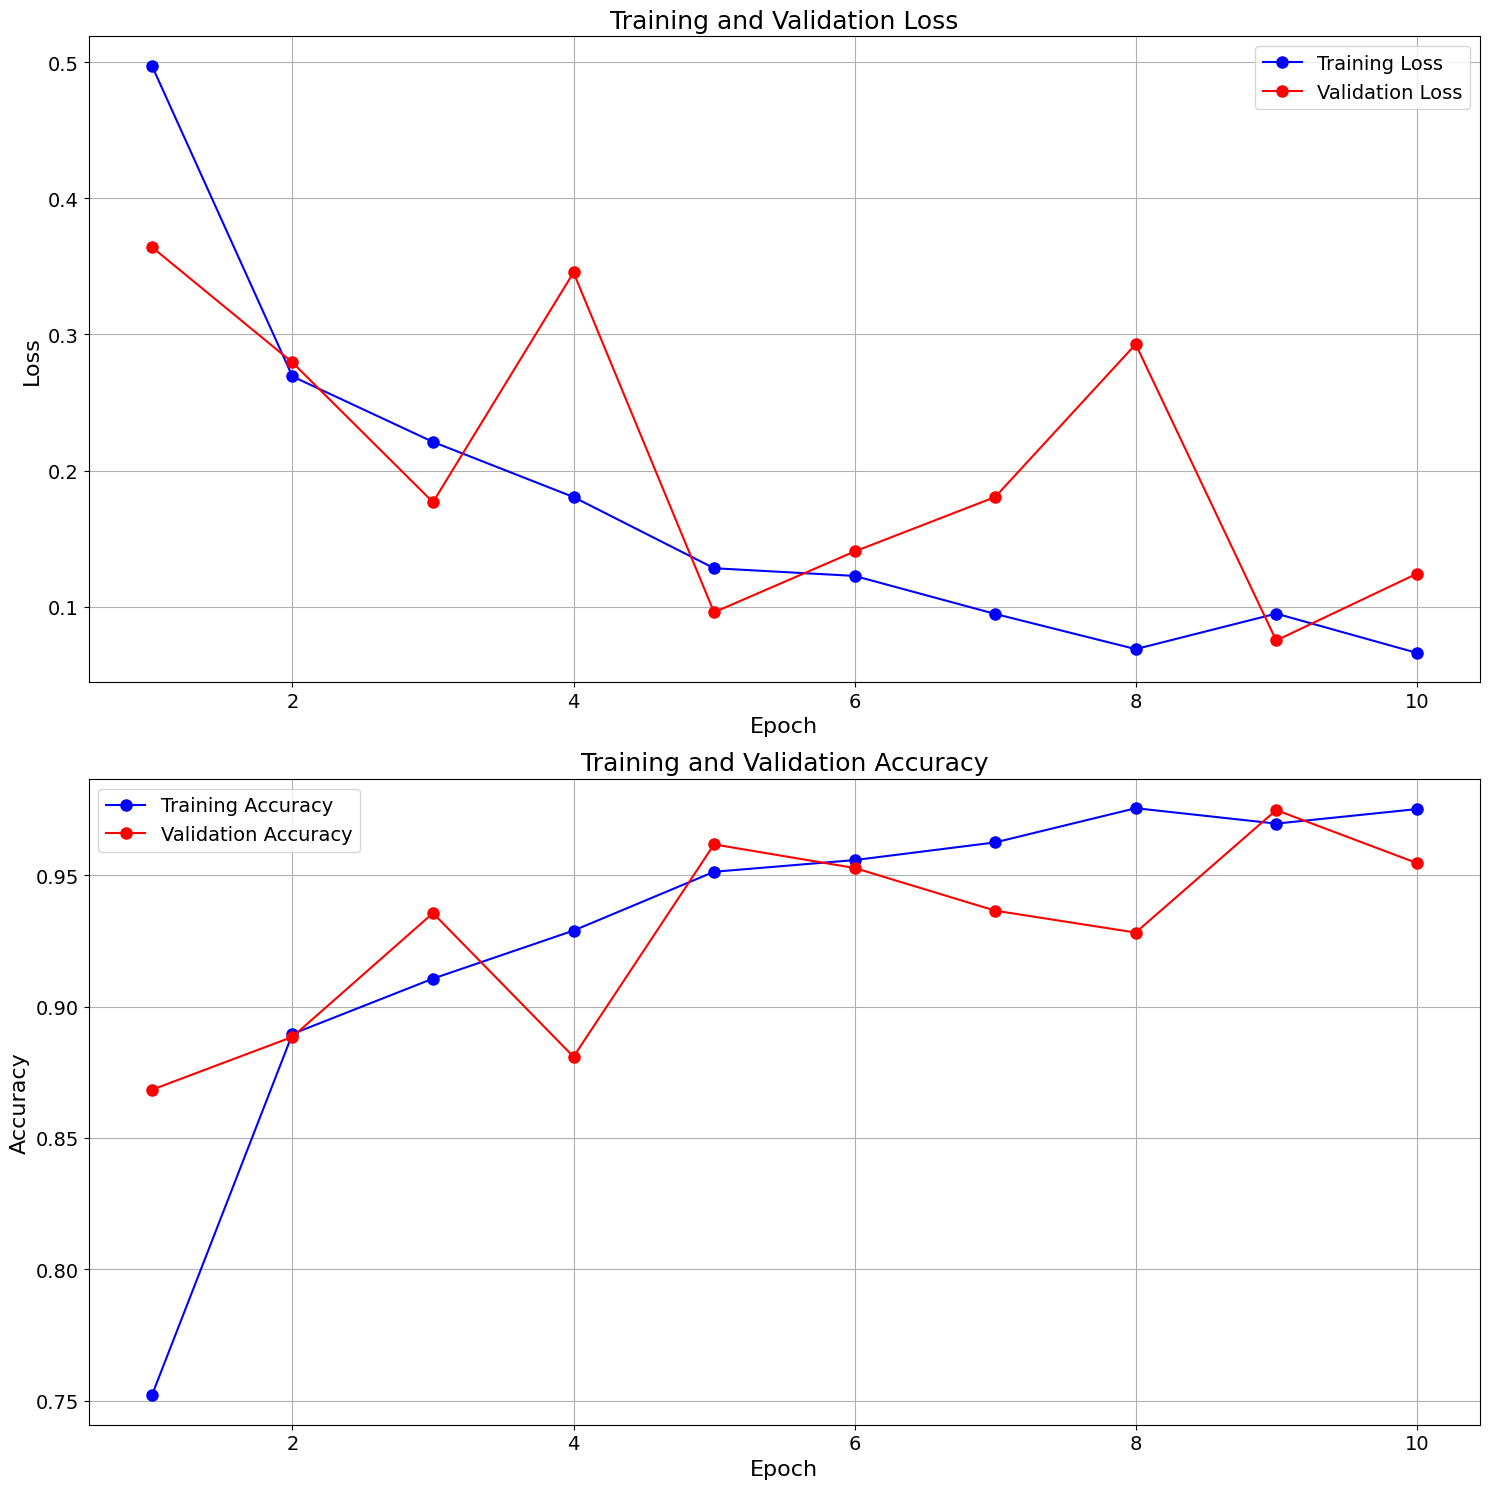

In [112]:
import matplotlib.pyplot as plt

def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    epochs = range(1, len(history.history["loss"]) + 1)

    plt.figure(figsize=(15, 15))

    # Plotting Loss
    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss', markersize=8)
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss', markersize=8)
    plt.title('Training and Validation Loss', fontsize=18)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=14)
    
    # Plotting Accuracy
    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy', markersize=8)
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy', markersize=8)
    plt.title('Training and Validation Accuracy', fontsize=18)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=14)

    plt.tight_layout()
    plt.show()


plot_curves(history)



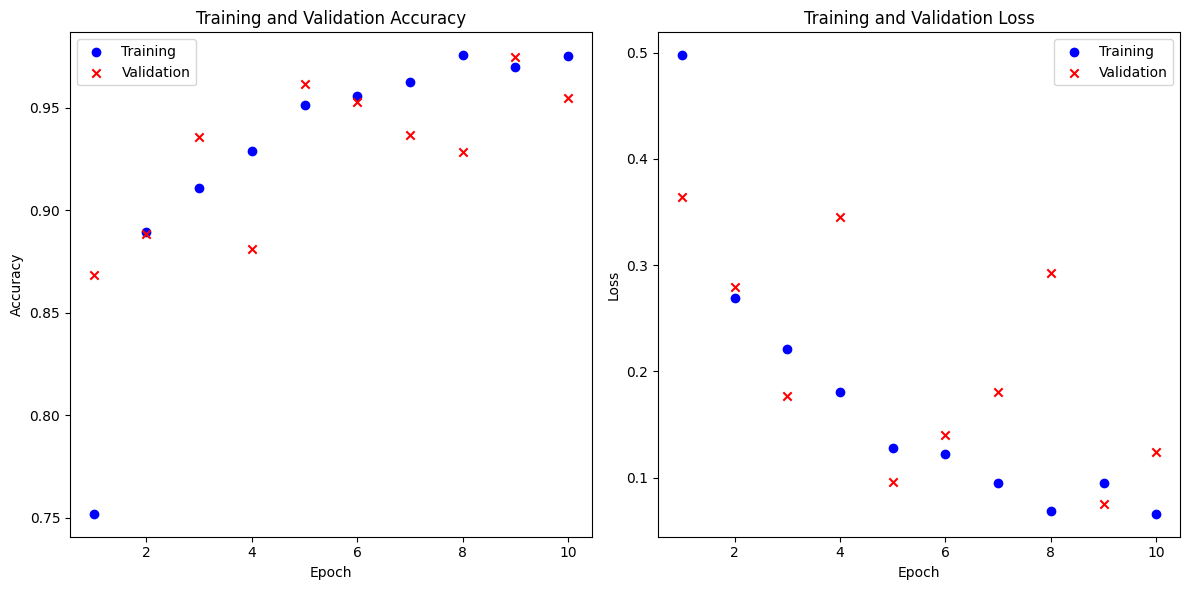

In [98]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(epochs, acc, color='blue', label='Training', marker='o')
plt.scatter(epochs, val_acc, color='red', label='Validation', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(epochs, loss, color='blue', label='Training', marker='o')
plt.scatter(epochs, val_loss, color='red', label='Validation', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


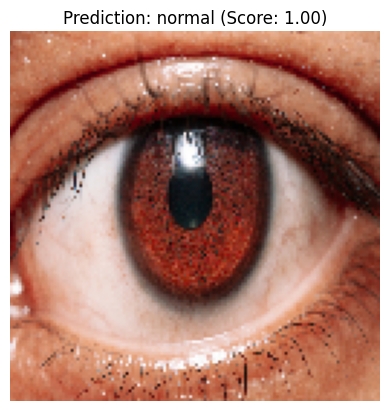

Predicted class: normal
Prediction Score: 0.99985564


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


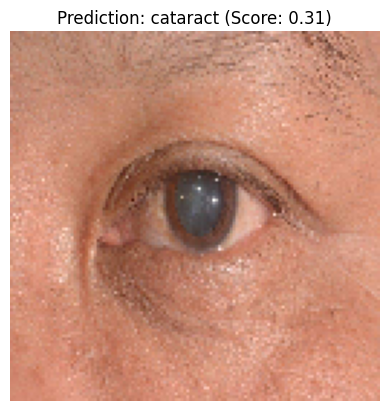

Predicted class: cataract
Prediction Score: 0.3051241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


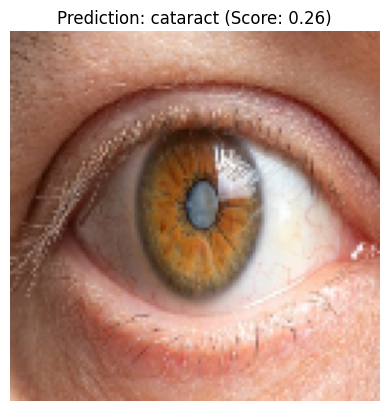

Predicted class: cataract
Prediction Score: 0.26387072


In [111]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

def predict_image_class(model_path, image_path, target_size=(128, 128), threshold=0.5):
    model = load_model(model_path)

    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  

    predictions = model.predict(img_array)

    prediction_score = predictions[0][0]
    if prediction_score > threshold:
        predicted_class = 'normal'
    else:
        predicted_class = 'cataract'

    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {predicted_class} (Score: {prediction_score:.2f})')
    plt.show()

    return predicted_class, prediction_score

model_path = r'C:\Users\probi\Downloads\Naani-server\model.h5'
image_path = r'C:\Users\probi\Downloads\Naani-server\normal.png'

predicted_class, prediction_score = predict_image_class(model_path, image_path)

print("Predicted class:", predicted_class)
print("Prediction Score:", prediction_score)

image_path1 = r'C:\Users\probi\Downloads\Naani-server\cataract.png'

predicted_class1, prediction_score1 = predict_image_class(model_path, image_path1)

print("Predicted class:", predicted_class1)
print("Prediction Score:", prediction_score1)

image_path1 = r'C:\Users\probi\Downloads\Naani-server\cataract1.png'

predicted_class1, prediction_score1 = predict_image_class(model_path, image_path1)

print("Predicted class:", predicted_class1)
print("Prediction Score:", prediction_score1)


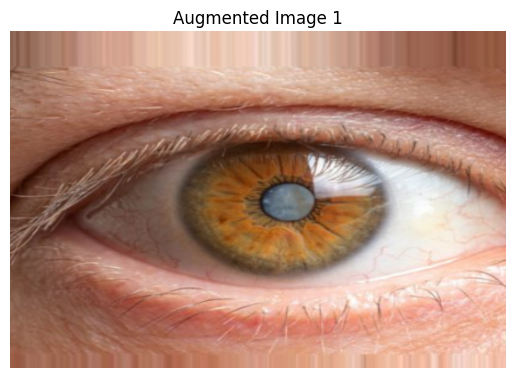

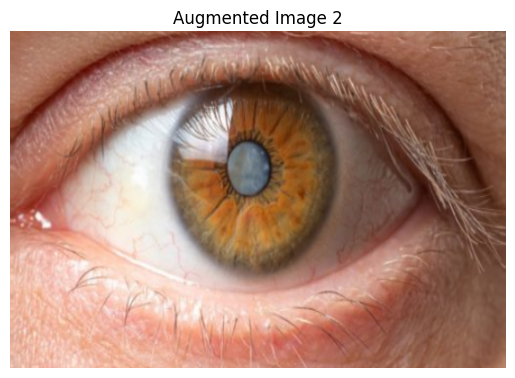

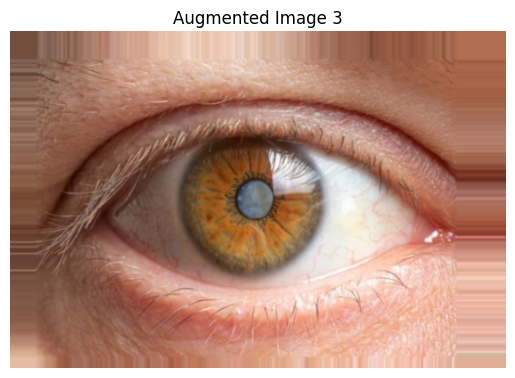

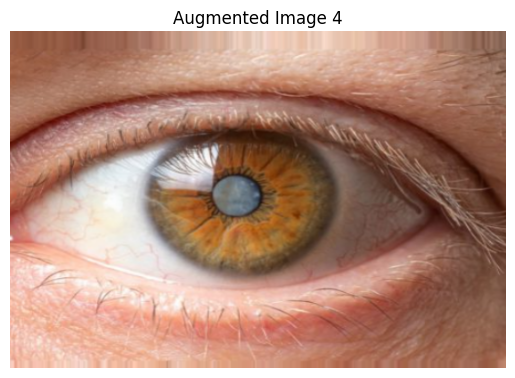

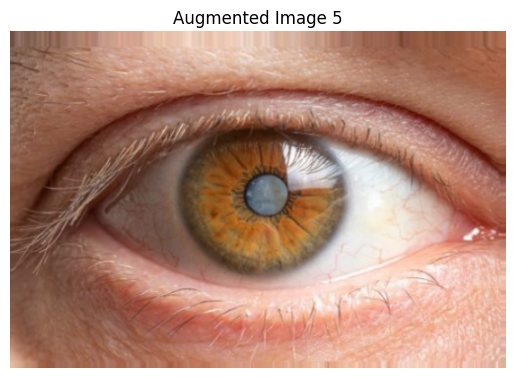

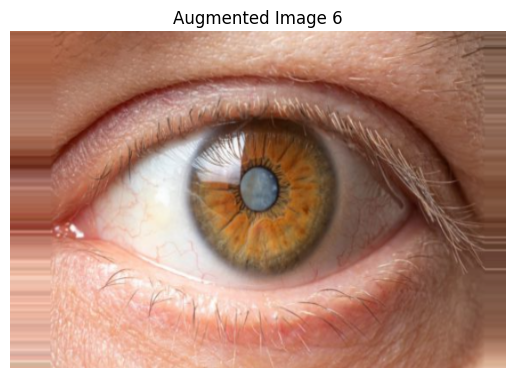

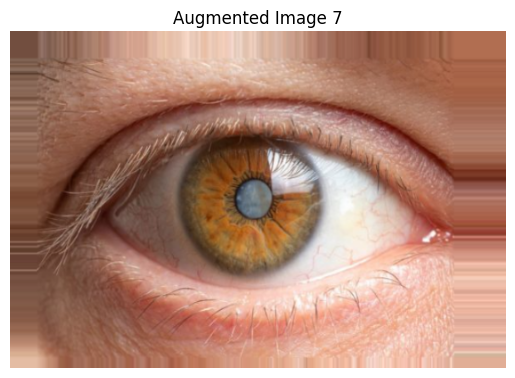

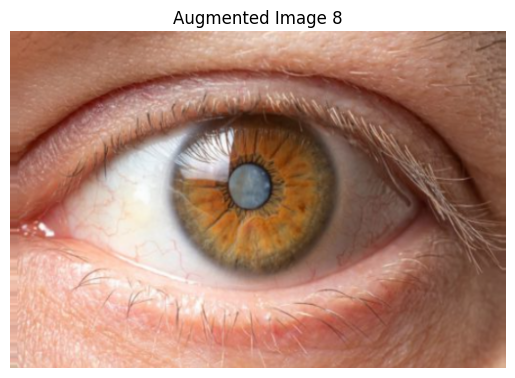

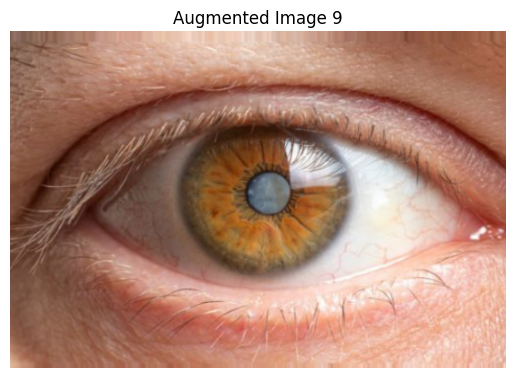

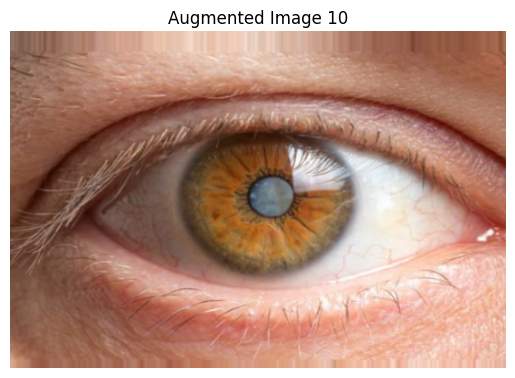

In [7]:
# demo of image augmentation in naani
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

test_image_path = r'C:\Users\probi\Downloads\Naani-server\cataract1.png'

img = load_img(test_image_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

aug_iter = datagen.flow(x, batch_size=1)

output_dir = r'C:\Users\probi\Downloads\Naani-server\augmented_images'
os.makedirs(output_dir, exist_ok=True)

for i in range(10):
    augmented_img = next(aug_iter)[0]
    augmented_img *= 255  
    augmented_img = np.clip(augmented_img, 0, 255).astype('uint8')  
    aug_img_path = os.path.join(output_dir, f'augmented_image_{i+1}.png')
    array_to_img(augmented_img).save(aug_img_path)

    plt.figure()
    plt.imshow(array_to_img(augmented_img))
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}')
    plt.show()


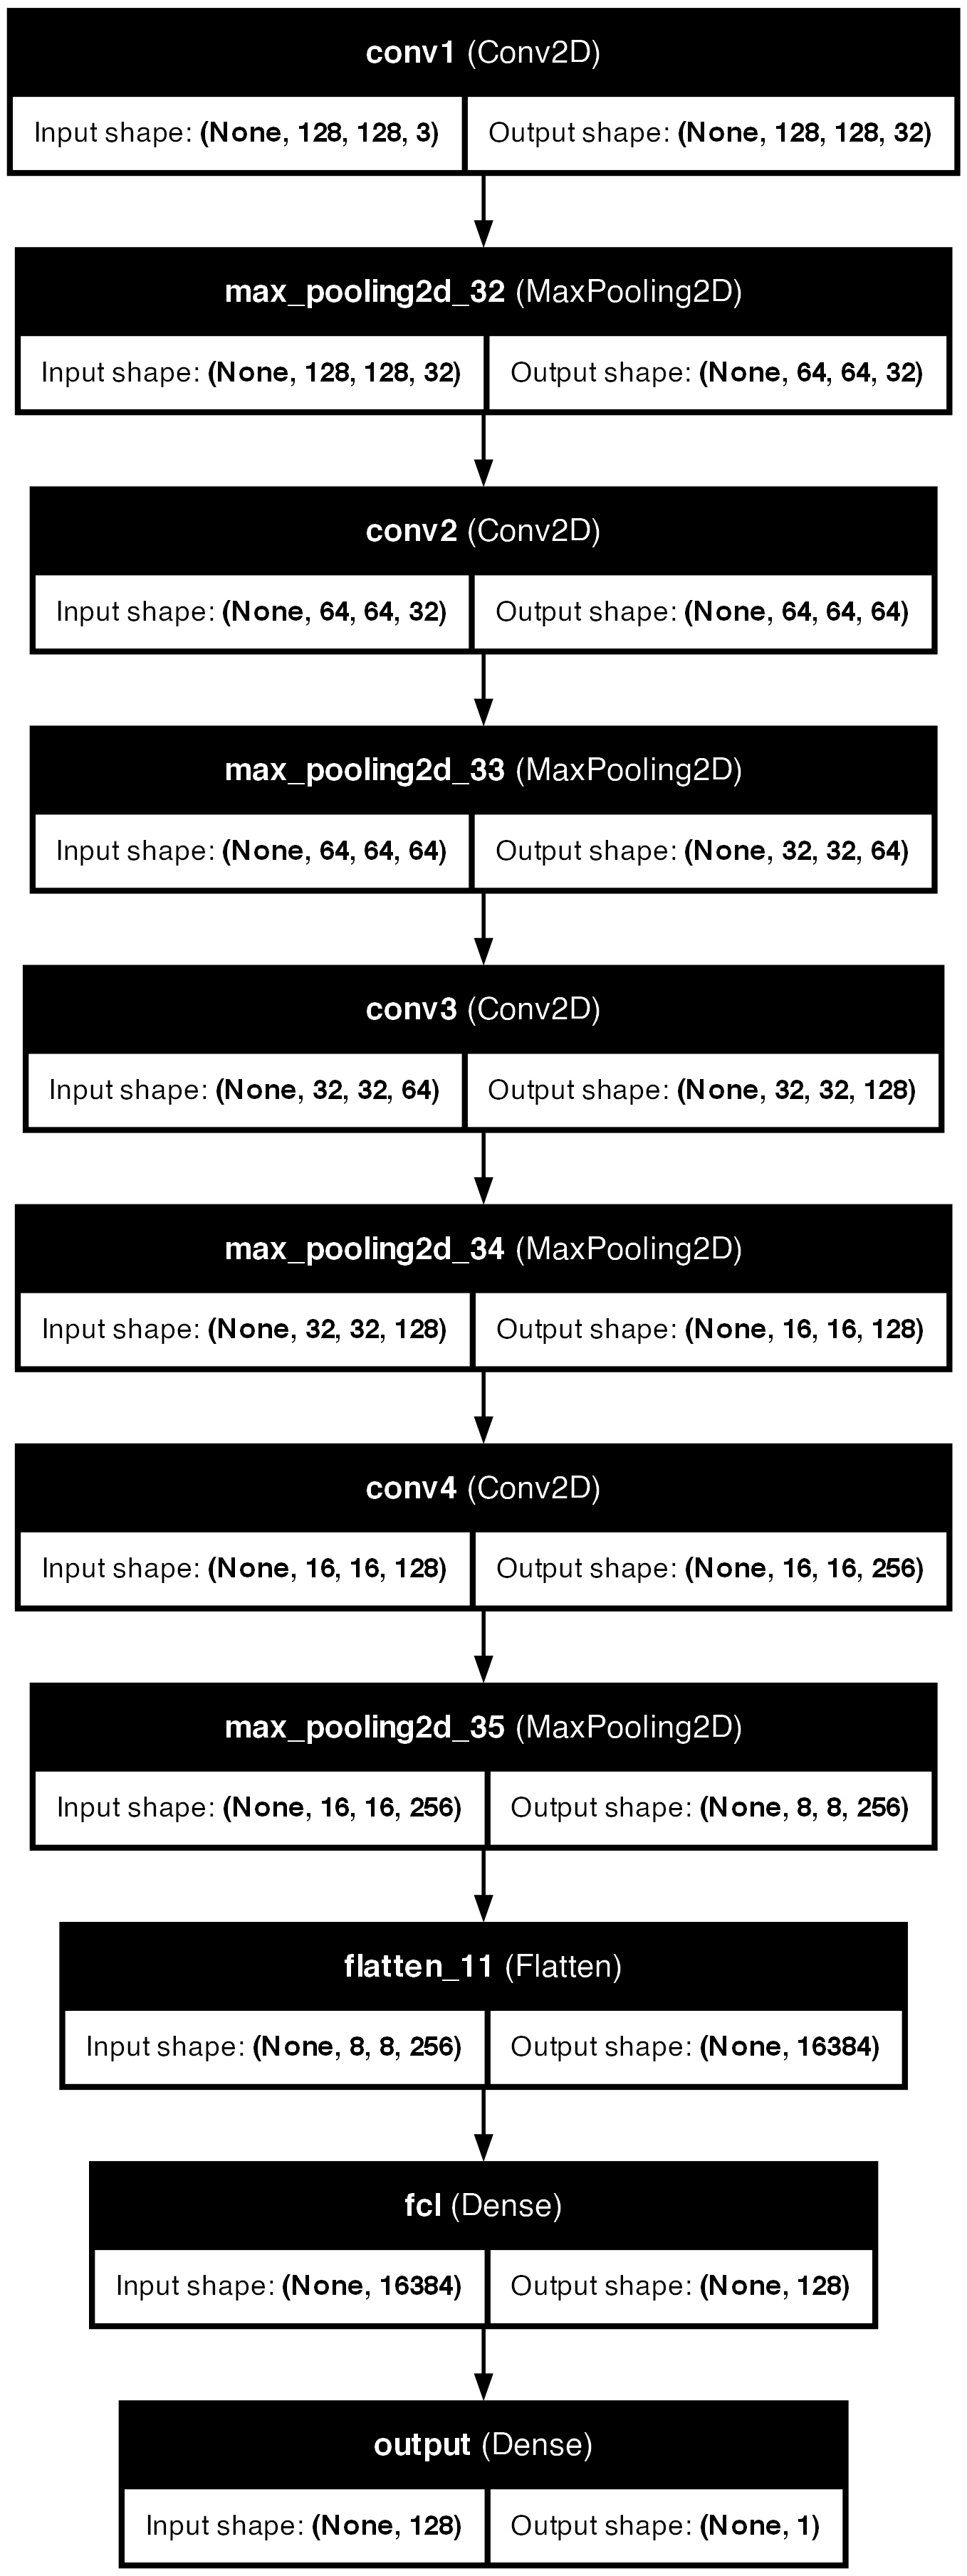

In [61]:
from keras.utils import plot_model
from keras.models import load_model

model_path = r'C:\Users\probi\Downloads\Naani-server\model.h5'
model = load_model(model_path)

plot_model(model, to_file='nanni_architecture.png', show_shapes=True, show_layer_names=True)
